### Introduction
#### For Capstone A Heart Disease Prediction: Sabay, Harris, Bejugama, Dr. Jaceldo
This is an exploration of Machine Learning classification techniques on heart attack prediction. This is preliminary work only for the purposes of having a better understanding of the how modern Data Science techniques can be applied to heart attack prediction.

### Data Description
Data from 4 individual databases were consolidated in this analysis. Data Source: UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Heart+Disease processed.cleveland.data, processed.hungarian.data, processed.switzerland.data, processed.va.data)

Feature variables:
1. age: continuous
2. sex: categorical, male: 1, female: 0
3. chest_pain: categorical, (1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina)
4. resting_bp: continous (mmHg), resting blood pressure when admitted to hospital.
5. cholesterol: (serum cholesterol level) continuous (mg/dl)
6. fast_bsugar: fasting blood sugar, categorical, 0: <= 120 mg/dl, 1: > 120 mg/dl
7. resting_ecg: resting electrocardiography, categorical, 0: normal, 1: ST-T wave abnormality, 2: leftventricular hypertropy
8. max_hrate: maximum heartrate achieved from thalium test. continuos
9. exer_angina: exercise induced angina. categorical (0:no, 1:yes)
10. oldpeak: ST depression induced by exercise relative to rest. continuous
11. slope: slope of peak exercise ST segment. categorical, 1: upsloping, 2: flat, 3: downsloping
12. ca_mavessel: number of major vessels colored by fluoroscopy: discrete (0,1,2,3,4)
13. heart_def_status: defect status code from thalium test, categorical, 3: normal, 6: fixed defect, 7: reversible defect
14. diag: (response variable) diagnoses of heart disease, categorical, 0: no 1: yes

Credit to Ty Shaikh for an advanced classification project on heart disease using data from UCI ML Repository (https://github.com/ty-shaikh/advanced-classification-example)


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint


# Read consolidated heart disease data
columns = ["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fast_bsugar", "resting_ecg", 
           "max_hrate", "exer_angina", "oldpeak", "slope", "ca_mavessel", "heart_def_status", "diag"]
df_main = pd.read_table("data/heart_disease_all14.csv", sep=',', header=None, names=columns)


### Descriptive Analysis


In [2]:
df_main.head()

,age,sex,chest_pain,resting_bp,cholesterol,fast_bsugar,resting_ecg,max_hrate,exer_angina,oldpeak,slope,ca_mavessel,heart_def_status,diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age                 299 non-null float64
sex                 299 non-null float64
chest_pain          299 non-null float64
resting_bp          299 non-null float64
cholesterol         299 non-null float64
fast_bsugar         299 non-null float64
resting_ecg         299 non-null float64
max_hrate           299 non-null float64
exer_angina         299 non-null float64
oldpeak             299 non-null float64
slope               299 non-null float64
ca_mavessel         299 non-null float64
heart_def_status    299 non-null float64
diag                299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


In [4]:
df_main.describe(include='all').T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,age,299.0,54.521739,9.030264,29.0,48.0,56.0,61.0,77.0
1,sex,299.0,0.678930,0.467670,0.0,0.0,1.0,1.0,1.0
2,chest_pain,299.0,3.163880,0.964069,1.0,3.0,3.0,4.0,4.0
3,resting_bp,299.0,131.715719,17.747751,94.0,120.0,130.0,140.0,200.0
4,cholesterol,299.0,246.785953,52.532582,100.0,211.0,242.0,275.5,564.0
5,fast_bsugar,299.0,0.143813,0.351488,0.0,0.0,0.0,0.0,1.0
6,resting_ecg,299.0,0.989967,0.994903,0.0,0.0,1.0,2.0,2.0
7,max_hrate,299.0,149.327759,23.121062,71.0,132.5,152.0,165.5,202.0
8,exer_angina,299.0,0.331104,0.471399,0.0,0.0,0.0,1.0,1.0
9,oldpeak,299.0,1.058528,1.162769,0.0,0.0,0.8,1.6,6.2


### Plots

/home/sabaysmu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


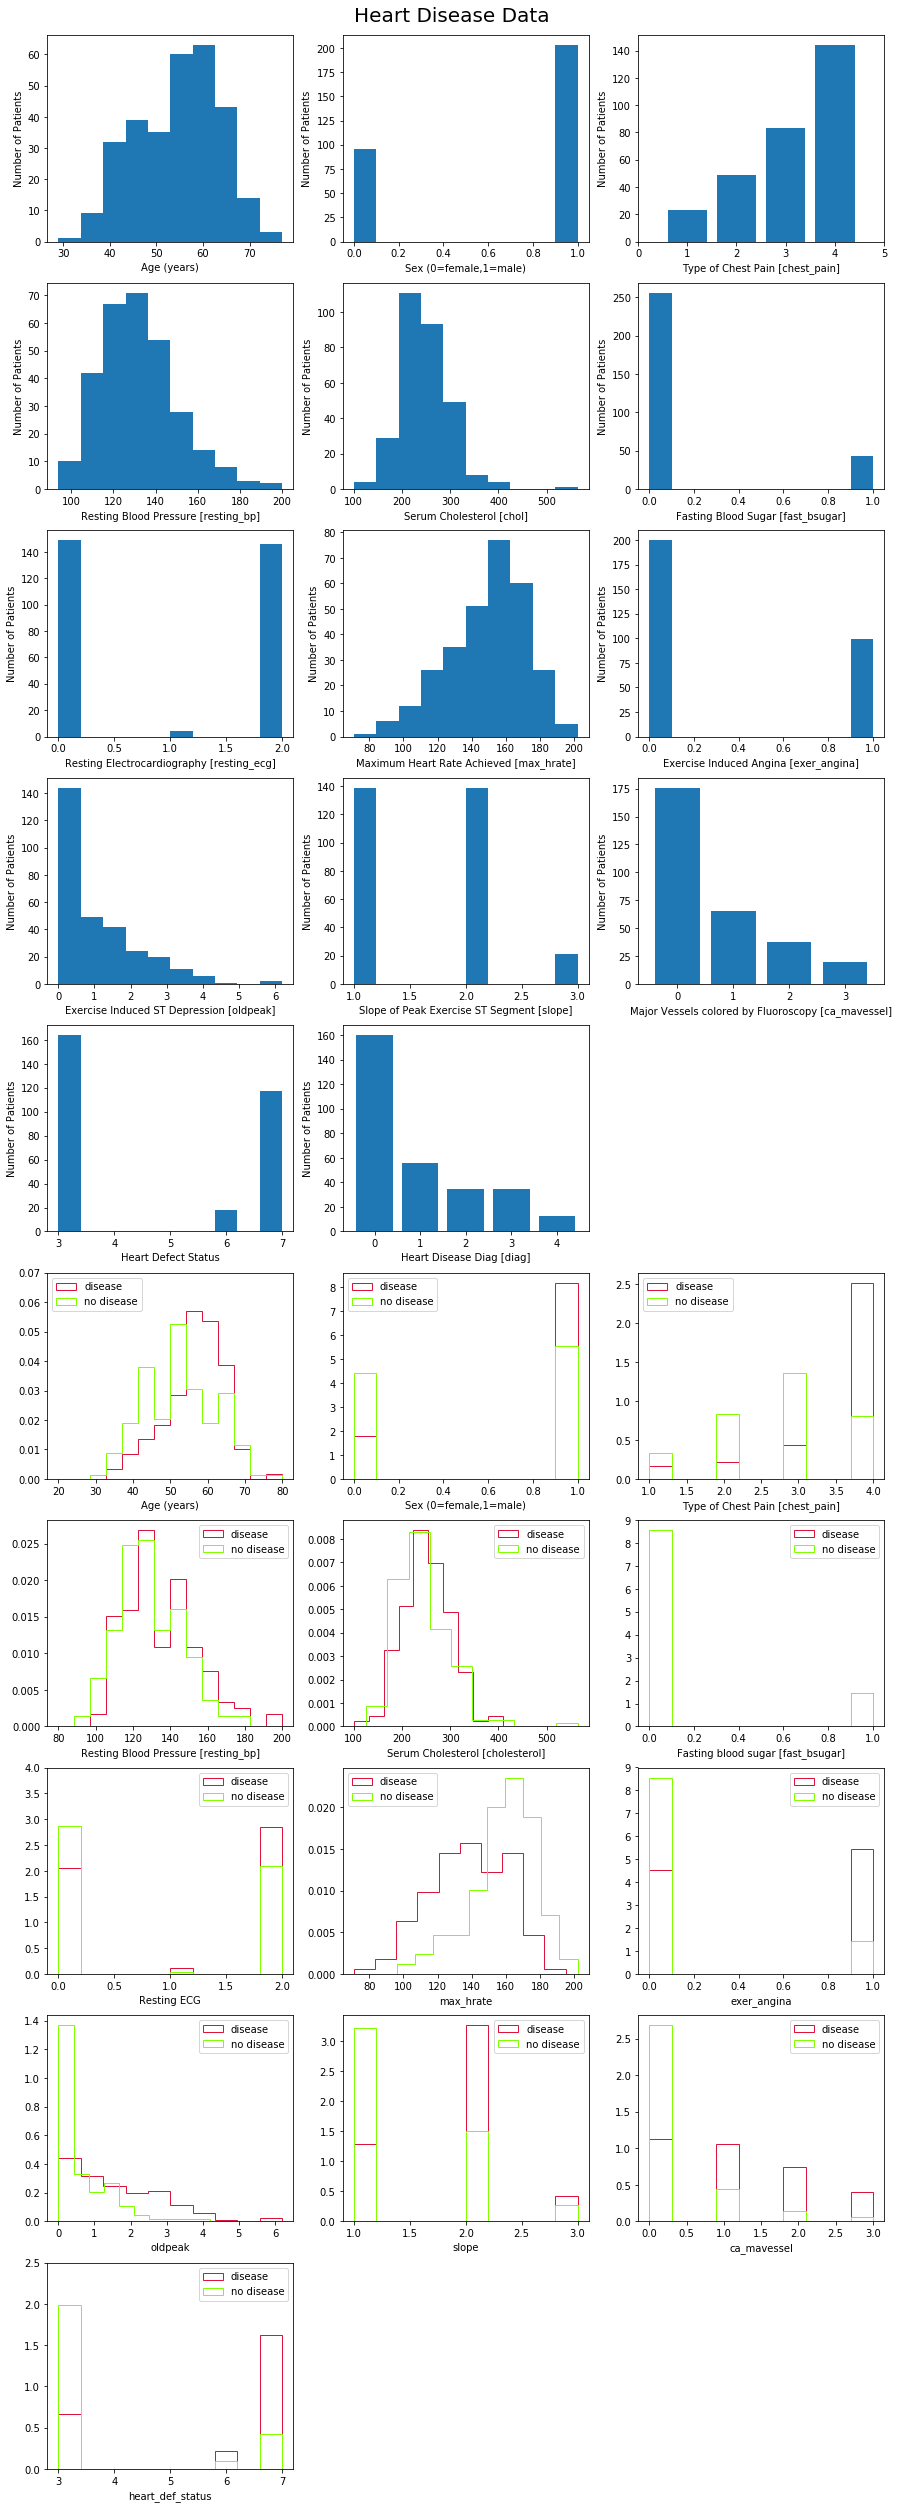

Intrinsic discrepancies between disease and no-disease, in decreasing order: 
   0.609044  (heart_def_status)
   0.584354  (chest_pain)
   0.478634  (ca_mavessel)
   0.456496  (max_hrate)
   0.420033  (oldpeak)
   0.352659  (exer_angina)
   0.312049  (slope)
   0.198552  (age)
   0.156002  (sex)
   0.058716  (resting_ecg)
   0.033252  (resting_bp)
   0.030527  (cholesterol)
   0.000000  (fast_bsugar)

Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  resting_bp  cholesterol  fast_bsugar  max_hrate  exer_angina  \
0  63.0  1.0       145.0        233.0          1.0      150.0          0.0   
1  67.0  1.0       160.0        286.0          0.0      108.0          1.0   
2  67.0  1.0       120.0        229.0          0.0      129.0          1.0   
3  37.0  1.0       130.0        250.0          0.0      187.0          0.0   
4  41.0  0.0       130.0        204.0          0.0      172.0          0.0   

   oldpeak  ca_mavessel  heart_diag  chest_pain

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

fig, axis = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axis[0,0].hist(df_main.age)
axis[0,0].set_xlabel("Age (years)")
axis[0,0].set_ylabel("Number of Patients")
axis[0,1].hist(df_main.sex)
axis[0,1].set_xlabel("Sex (0=female,1=male)")
axis[0,1].set_ylabel("Number of Patients")
axis[0,2].hist(df_main.chest_pain,bins=4,range=(0.5,4.5),rwidth=0.80)
axis[0,2].set_xlim(0.0,5.0)
axis[0,2].set_xlabel("Type of Chest Pain [chest_pain]")
axis[0,2].set_ylabel("Number of Patients")
axis[1,0].hist(df_main.resting_bp)
axis[1,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axis[1,0].set_ylabel("Number of Patients")
axis[1,1].hist(df_main.cholesterol)
axis[1,1].set_xlabel("Serum Cholesterol [chol]")
axis[1,1].set_ylabel("Number of Patients")
axis[1,2].hist(df_main.fast_bsugar)
axis[1,2].set_xlabel("Fasting Blood Sugar [fast_bsugar]")
axis[1,2].set_ylabel("Number of Patients")
axis[2,0].hist(df_main.resting_ecg)
axis[2,0].set_xlabel("Resting Electrocardiography [resting_ecg]")
axis[2,0].set_ylabel("Number of Patients")
axis[2,1].hist(df_main.max_hrate)
axis[2,1].set_xlabel("Maximum Heart Rate Achieved [max_hrate]")
axis[2,1].set_ylabel("Number of Patients")
axis[2,2].hist(df_main.exer_angina)
axis[2,2].set_xlabel("Exercise Induced Angina [exer_angina]")
axis[2,2].set_ylabel("Number of Patients")
axis[3,0].hist(df_main.oldpeak)
axis[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axis[3,0].set_ylabel("Number of Patients")
axis[3,1].hist(df_main.slope)
axis[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axis[3,1].set_ylabel("Number of Patients")
axis[3,2].hist(df_main.ca_mavessel,bins=4,range=(-0.5,3.5),rwidth=0.8)
axis[3,2].set_xlim(-0.7,3.7)
axis[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca_mavessel]")
axis[3,2].set_ylabel("Number of Patients")
axis[4,0].hist(df_main.heart_def_status)
axis[4,0].set_xlabel("Heart Defect Status")
axis[4,0].set_ylabel("Number of Patients")
axis[4,1].hist(df_main.diag,bins=5,range=(-0.5,4.5),rwidth=0.8)
axis[4,1].set_xlim(-0.7,4.7)
axis[4,1].set_xlabel("Heart Disease Diag [diag]")
axis[4,1].set_ylabel("Number of Patients")
axis[4,2].axis("off")

# Marginal feature distributions compared for disease and no-disease (likelihoods)
bins = np.linspace(20, 80, 15)
axis[5,0].hist(df_main[df_main.diag>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,0].hist(df_main[df_main.diag==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,0].set_xlabel("Age (years)")
axis[5,0].set_ylim(0.0,0.070)
axis[5,0].legend(prop={'size': 10},loc="upper left")
axis[5,1].hist(df_main[df_main.diag>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,1].hist(df_main[df_main.diag==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,1].set_xlabel("Sex (0=female,1=male)")
axis[5,1].legend(prop={'size': 10},loc="upper left")
axis[5,2].hist(df_main[df_main.diag>0].chest_pain.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[5,2].hist(df_main[df_main.diag==0].chest_pain,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[5,2].set_xlabel("Type of Chest Pain [chest_pain]")
axis[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axis[6,0].hist(df_main[df_main.diag>0].resting_bp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,0].hist(df_main[df_main.diag==0].resting_bp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axis[6,0].legend(prop={'size': 10},loc="upper right")
axis[6,1].hist(df_main[df_main.diag>0].cholesterol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,1].hist(df_main[df_main.diag==0].cholesterol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,1].set_xlabel("Serum Cholesterol [cholesterol]")
axis[6,1].legend(prop={'size': 10},loc="upper right")
axis[6,2].hist(df_main[df_main.diag>0].fast_bsugar.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[6,2].hist(df_main[df_main.diag==0].fast_bsugar,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[6,2].set_xlabel("Fasting blood sugar [fast_bsugar]")
axis[6,2].legend(prop={'size': 10},loc="upper right")
axis[7,0].hist(df_main[df_main.diag>0].resting_ecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,0].hist(df_main[df_main.diag==0].resting_ecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,0].set_xlabel("Resting ECG")
axis[7,0].set_ylim(0.0,4.0)
axis[7,0].legend(prop={'size': 10},loc="upper right")
axis[7,1].hist(df_main[df_main.diag>0].max_hrate.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,1].hist(df_main[df_main.diag==0].max_hrate,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,1].set_xlabel("max_hrate")
axis[7,1].legend(prop={'size': 10},loc="upper left")
axis[7,2].hist(df_main[df_main.diag>0].exer_angina.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[7,2].hist(df_main[df_main.diag==0].exer_angina,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[7,2].set_xlabel("exer_angina")
axis[7,2].legend(prop={'size': 10},loc="upper right")
axis[8,0].hist(df_main[df_main.diag>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,0].hist(df_main[df_main.diag==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,0].set_xlabel("oldpeak")
axis[8,0].legend(prop={'size': 10},loc="upper right")
axis[8,1].hist(df_main[df_main.diag>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,1].hist(df_main[df_main.diag==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,1].set_xlabel("slope")
axis[8,1].legend(prop={'size': 10},loc="upper right")
axis[8,2].hist(df_main[df_main.diag>0].ca_mavessel.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[8,2].hist(df_main[df_main.diag==0].ca_mavessel,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[8,2].set_xlabel("ca_mavessel")
axis[8,2].legend(prop={'size': 10},loc="upper right")
axis[9,0].hist(df_main[df_main.diag>0].heart_def_status.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axis[9,0].hist(df_main[df_main.diag==0].heart_def_status,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axis[9,0].set_xlabel("heart_def_status")
axis[9,0].set_ylim(0.0,2.5)
axis[9,0].legend(prop={'size': 10},loc="upper right")
axis[9,1].axis("off")
axis[9,2].axis("off")
plt.show()

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.

def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = sum(xval for xval in x)
    sumy = sum(yval for yval in y)
    id1  = 0.0
    id2  = 0.0
    for (xval,yval) in zip(x,y):
        if (xval>0) and (yval>0):
            id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
            id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
    return min(id1,id2)

# Compute intrinsic discrepancies between disease and no-disease feature distributions
int_discr = {}
hist,bin_edges   = np.histogram(df_main.age,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].age,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].age,bins=bin_edges,density=False)
int_discr["age"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].sex,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].sex,bins=(-0.5,0.5,1.5),density=False)
int_discr["sex"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
int_discr["chest_pain"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.resting_bp,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_bp,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_bp,bins=bin_edges,density=False)
int_discr["resting_bp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.cholesterol,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].cholesterol,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].cholesterol,bins=bin_edges,density=False)
int_discr["cholesterol"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
int_discr["fast_bsugar"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
int_discr["resting_ecg"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.max_hrate,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].max_hrate,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].max_hrate,bins=bin_edges,density=False)
int_discr["max_hrate"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
int_discr["exer_angina"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.oldpeak,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].oldpeak,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].oldpeak,bins=bin_edges,density=False)
int_discr["oldpeak"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
int_discr["slope"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
int_discr["ca_mavessel"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
int_discr["heart_def_status"] = intrinsic_discrepancy(hist1,hist2)
id_list = Counter(int_discr).most_common()

print('Intrinsic discrepancies between disease and no-disease, in decreasing order: ')
for item in id_list:
    print('   %f  (%s)' % (item[1],item[0]))
    
# Data transformation section
# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
# Standardize and Normalize data
df      = df_main.copy()
dummies = pd.get_dummies(df["chest_pain"],prefix="chest_pain")
df      = df.join(dummies)
del df["chest_pain"]
del df["chest_pain_4.0"]
df      = df.rename(columns = {"chest_pain_1.0":"chest_pain_1","chest_pain_2.0":"chest_pain_2","chest_pain_3.0":"chest_pain_3"})

dummies = pd.get_dummies(df["resting_ecg"],prefix="resting_ecg")
df      = df.join(dummies)
del df["resting_ecg"]
del df["resting_ecg_0.0"]
df      = df.rename(columns = {"resting_ecg_1.0":"resting_ecg_1","resting_ecg_2.0":"resting_ecg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["heart_def_status"],prefix="heart_def_status")
df      = df.join(dummies)
del df["heart_def_status"]
del df["heart_def_status_3.0"]
df      = df.rename(columns = {"heart_def_status_6.0":"heart_def_status_6","heart_def_status_7.0":"heart_def_status_7"})

# Replace response variable values and rename
df["diag"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"diag":"heart_diag"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "resting_bp", "cholesterol", "fast_bsugar", "max_hrate", 
                 "exer_angina", "oldpeak", "ca_mavessel", "heart_diag", "chest_pain_1", "chest_pain_2",
                 "chest_pain_3", "resting_ecg_1", "resting_ecg_2", "slope_1", "slope_3",
                 "heart_def_status_6", "heart_def_status_7"]

print('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.heart_diag==1].index),len(df[df.heart_diag==0].index)))
print(df.head())
print(df.describe())

# Standardize the dataframe
stdcols = ["age","resting_bp","cholesterol","max_hrate","oldpeak"]
nrmcols = ["ca_mavessel"]
stddf   = df.copy()
scl = StandardScaler()
nrm = Normalizer()

'''stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))'''

stddf[stdcols] = scl.fit_transform(stddf[stdcols])
stddf[nrmcols] = nrm.fit_transform(stddf[nrmcols])

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["heart_diag"]
Xall = stddf[new_columns_2[1:]].values

In [6]:
stddf.head()

,heart_diag,age,sex,resting_bp,cholesterol,fast_bsugar,max_hrate,exer_angina,oldpeak,ca_mavessel,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,slope_1,slope_3,heart_def_status_6,heart_def_status_7
0,0.0,0.940446,1.0,0.749760,-0.262867,1.0,0.029124,0.0,1.069475,0.0,1,0,0,0,1,0,1,1,0
1,1.0,1.384143,1.0,1.596354,0.747722,0.0,-1.790447,1.0,0.380309,1.0,0,0,0,0,1,0,0,0,0
2,1.0,1.384143,1.0,-0.661231,-0.339138,0.0,-0.880662,1.0,1.327912,1.0,0,0,0,0,1,0,0,0,1
3,0.0,-1.943588,1.0,-0.096835,0.061285,0.0,1.632079,0.0,2.103224,0.0,0,0,1,0,0,0,1,0,0
4,0.0,-1.499891,0.0,-0.096835,-0.815830,0.0,0.982232,0.0,0.294163,0.0,0,1,0,0,1,1,0,0,0


In [7]:
stddf.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_diag,299.0,4.648829e-01,0.499601,0.000000,0.000000,0.000000,1.000000,1.000000
age,299.0,1.158494e-16,1.001676,-2.830983,-0.723420,0.163975,0.718597,2.493387
sex,299.0,6.789298e-01,0.467670,0.000000,0.000000,1.000000,1.000000,1.000000
resting_bp,299.0,-5.940993e-17,1.001676,-2.128661,-0.661231,-0.096835,0.467562,3.853939
cholesterol,299.0,2.643742e-16,1.001676,-2.798873,-0.682356,-0.091257,0.547511,6.048548
fast_bsugar,299.0,1.438127e-01,0.351488,0.000000,0.000000,0.000000,0.000000,1.000000
max_hrate,299.0,1.307018e-16,1.001676,-3.393403,-0.729031,0.115770,0.700632,2.281926
exer_angina,299.0,3.311037e-01,0.471399,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,299.0,-7.129191e-17,1.001676,-0.911877,-0.911877,-0.222711,0.466455,4.429159
ca_mavessel,299.0,4.113712e-01,0.492907,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Logistic Regression with cross-validation
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics as mt
from sklearn.model_selection import StratifiedShuffleSplit as ssplt
from sklearn.model_selection import StratifiedKFold as skfold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score


yhat = np.zeros(yall.shape) # prediction bucket
num_cv_iterations = 3
num_instances = len(yall)
cv_object = ssplt(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# Use GridSearchCV to find optimal hyperparameters, then use it in validation loop
X_train, X_test, y_train, y_test = train_test_split(Xall, yall)

pipeline = Pipeline([('clf', LogisticRegression())])
parameters = {
'clf__penalty': ('l1','l2'),
'clf__C': (0.01, 0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1,verbose=1, scoring='accuracy', cv=num_cv_iterations)
X_train, X_test, y_train, y_test = train_test_split(Xall, yall)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:') 
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

# Use cv_object to cross-validate using the grid_search object's tuned parameters
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''




Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best score: 0.844
Best parameters set:
	clf__C: 1
Accuracy: 0.88
Precision: 0.9166666666666666
Recall: 0.8461538461538461
	clf__penalty: 'l2'
Accuracy: 0.88
Precision: 0.9166666666666666
Recall: 0.8461538461538461
Fitting 3 folds for each of 8 candidates, totalling 24 fits
====Iteration 0  ====
accuracy 0.8666666666666667
confusion matrix
 [[29  3]
 [ 5 23]]
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


====Iteration 1  ====
accuracy 0.8666666666666667
confusion matrix
 [[29  3]
 [ 5 23]]
Fitting 3 folds for each of 8 candidates, totalling 24 fits
====Iteration 2  ====
accuracy 0.8166666666666667
confusion matrix
 [[27  5]
 [ 6 22]]


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [10]:
'''
Note about logistic regression with scikit-learn and with statsmodels:
* In scikit-learn we can specify penalty="l1" or penalty="l2", with
  an associated C=c, which is the *inverse* of the regularization strength.
  Thus, for zero regularization specify a high value of c.  Scikit-learn
  does not calculate uncertainties on the fit coefficients.
* In statsmodels we can specify method="l1" and an associated regularization
  strength alpha.  There is no method="l2", but no-regularization can be
  obtained by setting alpha=0.  Statsmodels does compute uncertainties on
  the fit coefficients.
In the following couple of cells we do a fit to the heart-disease data
with all features included, first with scikit-learn, then with statsmodels.
Let's make sure we understand what we are doing by obtaining the same results
with both software packages.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = False

nfeatures = len(stddf.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model = LogisticRegression(fit_intercept=True,penalty=penalty,dual=False,C=cval)
print(model)
lrfit = model.fit(Xall,yall)
print('\nLogisticRegression score on full data set: %f\n' % lrfit.score(Xall,yall))
ypred = model.predict(Xall)
print('\nClassification report on full data set:')
print(metrics.classification_report(yall,ypred))
print('\nConfusion matrix:')
print(metrics.confusion_matrix(yall,ypred))
print('\nLogisticRegression coefficients:')
coeff = model.coef_.tolist()[0]
for index in range(len(coeff)):
    print('%s : %8.5f' % (new_columns_2[index+1].rjust(9),coeff[index]))
print('Intercept : %f' %model.intercept_)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression score on full data set: 0.879599


Classification report on full data set:
             precision    recall  f1-score   support

        0.0       0.87      0.91      0.89       160
        1.0       0.89      0.84      0.87       139

avg / total       0.88      0.88      0.88       299


Confusion matrix:
[[146  14]
 [ 22 117]]

LogisticRegression coefficients:
      age : -0.16118
      sex :  1.53670
resting_bp :  0.47737
cholesterol :  0.20848
fast_bsugar : -0.57369
max_hrate : -0.38859
exer_angina :  0.61607
  oldpeak :  0.53667
ca_mavessel :  2.46125
chest_pain_1 : -2.30866
chest_pain_2 : -0.95450
chest_pain_3 : -2.12851
resting_ecg_1 :  0.81978
resting_ecg_2 :  0.43306
  slope_1 : -1.24047
  slo

### Decision Tree Classification
Seems both precision and recall dropped with DT (entropy and gini)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Xall, yall)

pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}

In [12]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print (classification_report(y_test, predictions))
print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.687
Best parameters set:
	clf__max_depth: 400
	clf__min_samples_leaf: 3
	clf__min_samples_split: 2
             precision    recall  f1-score   support

        0.0       0.78      0.71      0.74        41
        1.0       0.68      0.76      0.72        34

avg / total       0.74      0.73      0.73        75


Confusion matrix:
[[29 12]
 [ 8 26]]


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.3s finished


### Random Forest Classifier
Slightly improved precision and recall (does better with gini)

In [13]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(X_test)
print (classification_report(y_test, predictions))
print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.787
Best parameters set:
	clf__max_depth: 400
	clf__min_samples_leaf: 4
	clf__min_samples_split: 4
             precision    recall  f1-score   support

        0.0       0.90      0.88      0.89        41
        1.0       0.86      0.88      0.87        34

avg / total       0.88      0.88      0.88        75


Confusion matrix:
[[36  5]
 [ 4 30]]


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    1.2s finished
